In [1]:
import numpy as np
import pandas as pd
from pandas.core.indexes.numeric import NumericIndex

In [2]:
df = pd.read_csv('laptop_data.csv')
df.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [3]:
df.shape

(1303, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


In [5]:
df.duplicated().sum()

0

In [6]:
df.isnull().sum()

Unnamed: 0          0
Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

### Data Preprocessing -

In [7]:
df.drop(columns=['Unnamed: 0'], inplace=True)

In [8]:
df['Ram'] = df['Ram'].str.replace('GB', '')

In [9]:
df['Weight'] = df['Weight'].str.replace('kg', '')

In [10]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080


In [11]:
df['Ram'] = df['Ram'].astype('int32')

In [12]:
df['Weight'] = df['Weight'].astype('float32')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
dtypes: float32(1), float64(2), int32(1), object(7)
memory usage: 101.9+ KB


### Exploratory Data Analysis -

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

What is the Price range of Laptops?

C:\Users\Rakshita\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


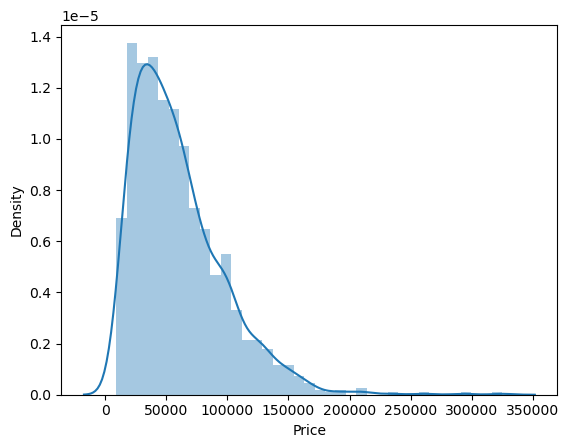

In [15]:
sns.distplot(df.Price)
plt.show()

**Inference-**
- The data is positively skewed.
- There are more no. of laptops with low price and less no. of laptops with higher price.
- Since laptop is a commodity, this observation is expected from customer's perspective.
- Skewed data may cause problem in convergence of some algorithms, which we need to take care of.

How many laptops are from each Laptop Company?

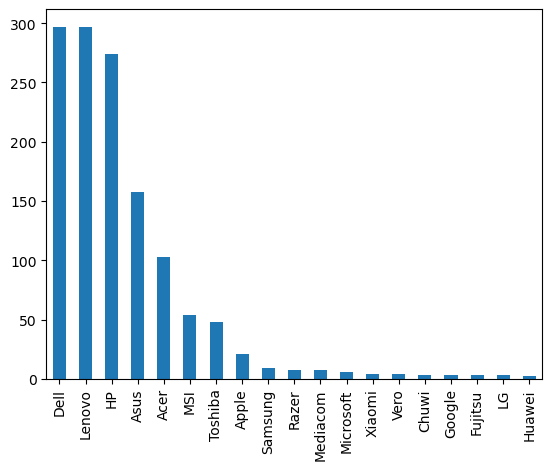

In [16]:
df['Company'].value_counts().plot(kind='bar')
plt.show()

**Inference-**
- Most famous laptop brands are of Dell, Lenovo and HP.
- Second most famous laptop brands are Asus, Acer, MSI, Toshiba, Apple and Samsung.
- Other all brands are least famous in laptops industry.

What is the Average Price value of each Laptop Brand?

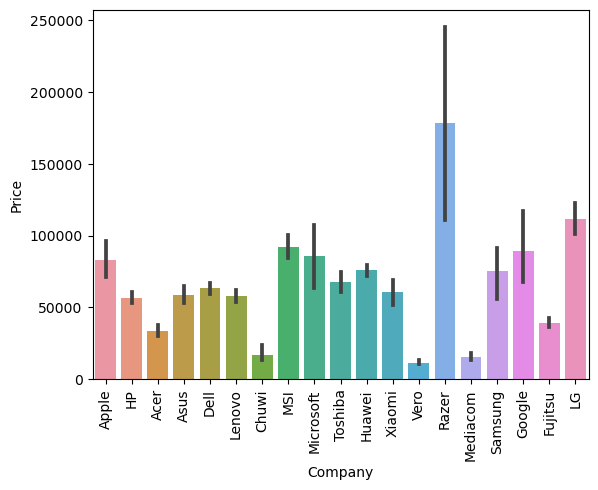

In [17]:
sns.barplot(x=df.Company, y=df.Price)
plt.xticks(rotation='vertical')
plt.show()

**Inference-**
- Apple, MSI, Microsoft, Razer, Google and LG laptops are highly expensive.
- HP, Acer, Asus, Dell, Lenovo, Toshiba, Huawei, Xiaomi and Samsung laptops are budget friendly.
- Chuwi, Vero, Mediacom and Fujitsu are some unpopular brands with cheapest Price.

What are all the Types of Laptops?

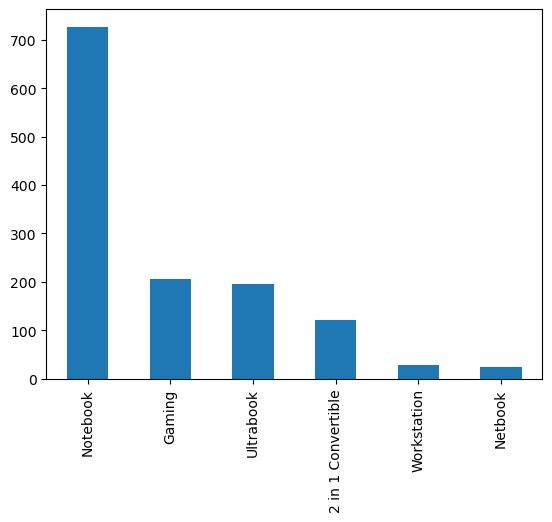

In [18]:
df['TypeName'].value_counts().plot(kind='bar')
plt.show()

**Inference-**
- Notebook is the most sold laptop type, since it is budget friendly, especially to students.
- Gaming, Ultrabook and 2 in 1 Convertible laptops are not sold in large amount, since they're for specific purposes and little expensive.
- Workstation is heavy duty laptop which is used by specific users.
- Netbook is the cheapest laptop with less no. of configurations and it is not much used.

What is the Average Price value of each Laptop Type?

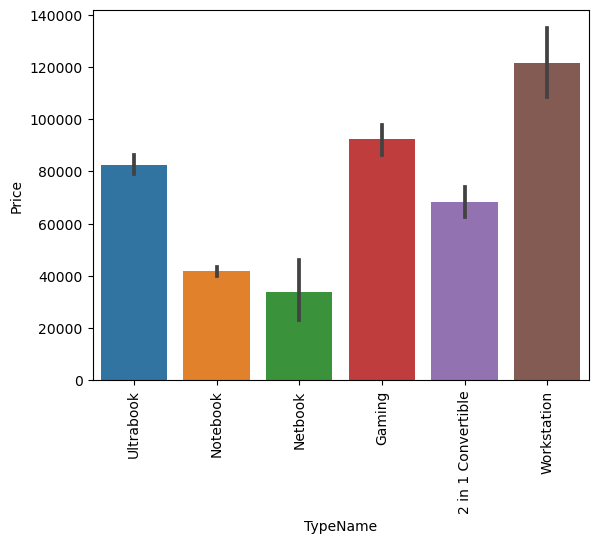

In [19]:
sns.barplot(x=df.TypeName, y=df.Price)
plt.xticks(rotation='vertical')
plt.show()

**Inference-**
- Workstation is most expensive type of laptop.
- Gaming, Ultrabook and 2 in 1 Convertible laptops are not sold in large amount, since they're also expensive.
- Notebook is quite as per customer's budget range.
- Netbook is the cheapest laptop type.
- Type of laptop is an important column to predict the price of laptops based on its type.

How is size of the Laptop affecting the Price?

C:\Users\Rakshita\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


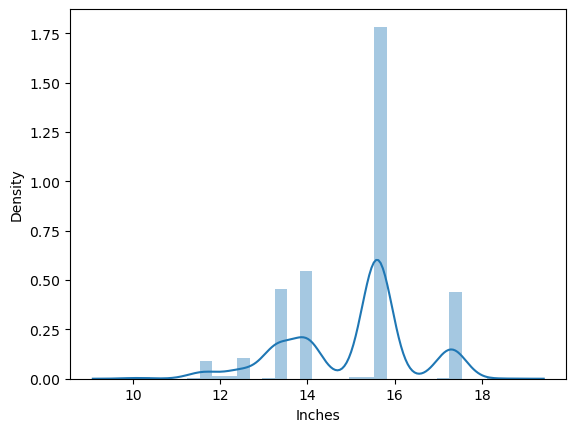

In [20]:
sns.distplot(df.Inches)
plt.show()

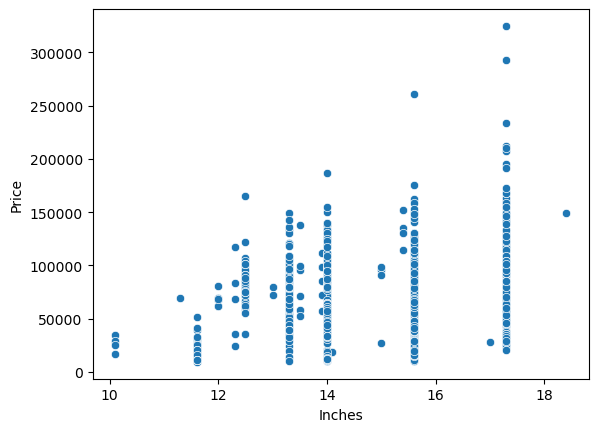

In [21]:
sns.scatterplot(x=df.Inches, y=df.Price)
plt.show()

**Inference-**
- As the size of laptop increases, price also increases.
- There is a slight correlation between size and price of laptops, but most of the laptops fall under a range where there is no effect of size of laptop on the price of laptop.
- There is no strong correlation between Inches and Price of laptops, but still we can rely on this feature for now.

In [22]:
df.ScreenResolution.value_counts()

Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x1440               

### Feature Engineering -

- Fetching information from ScreenResolution column.

In [23]:
df['Touchscreen'] = df.ScreenResolution.apply(lambda x:1 if 'Touchscreen' in x else 0)

In [24]:
df.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen
506,Asus,Notebook,15.6,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8,256GB SSD + 1TB HDD,Intel HD Graphics 620,Windows 10,2.00,65214.7200,0
424,Dell,Gaming,17.3,IPS Panel 2560x1440,Intel Core i7 7820HK 2.9GHz,16,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1070,Windows 10,4.42,149130.7200,0
833,Lenovo,Notebook,14.0,Full HD 1920x1080,Intel Core i5 6200U 2.3GHz,8,256GB SSD,Intel HD Graphics 520,Windows 10,1.70,63190.0800,0
1140,Lenovo,2 in 1 Convertible,14.0,IPS Panel Touchscreen 2560x1440,Intel Core i7 6600U 2.6GHz,16,512GB SSD,Intel HD Graphics 520,Windows 10,2.80,130003.2000,1
835,Dell,Gaming,15.6,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1070,Windows 10,3.21,147832.2864,0


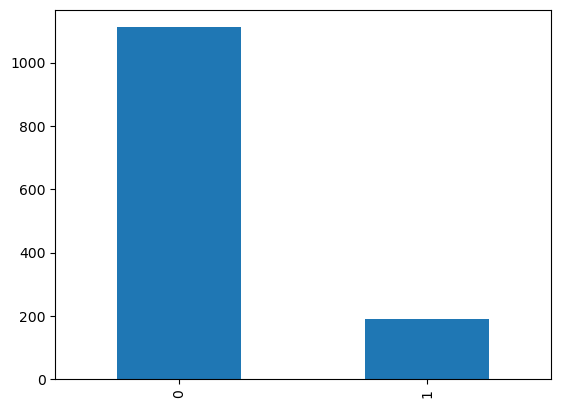

In [25]:
df.Touchscreen.value_counts().plot(kind='bar')
plt.show()

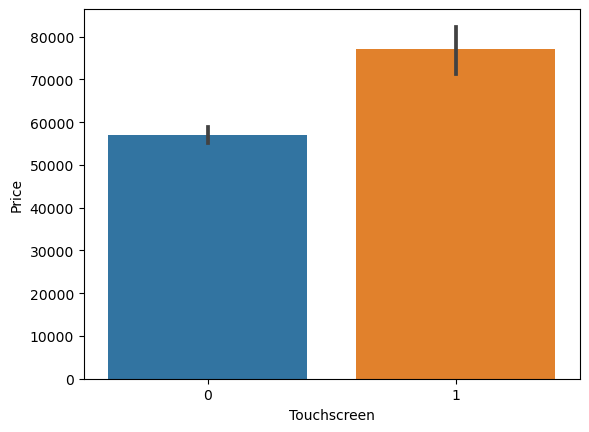

In [26]:
sns.barplot(x=df.Touchscreen, y=df.Price)
plt.show()

**Inference-**
- There are very less no. of Touchscreen laptops compared to other laptops.
- Touchscreen laptops are expensive compared to non-touchscreen laptops.
- Hence, Touchscreen column is important for further analysis.

Laptops have IPS Panel or not?

In [27]:
df['IPS'] = df.ScreenResolution.apply(lambda x:1 if 'IPS' in x else 0)

In [28]:
df.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS
1253,Lenovo,Notebook,14.0,IPS Panel Full HD 1920x1080,Intel Core i5 6200U 2.3GHz,8,256GB SSD,Intel HD Graphics 520,Windows 10,1.9,57116.16,0,1
950,HP,Workstation,15.6,IPS Panel Full HD 1920x1080,Intel Core i7 6820HQ 2.7GHz,8,8GB SSD,Nvidia Quadro M1000M,Windows 10,2.0,119826.72,0,1
174,HP,Notebook,17.3,Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8,256GB SSD,Nvidia GeForce 930MX,Windows 10,2.5,49177.44,0,0
403,Acer,Notebook,15.6,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,8,256GB SSD,Nvidia GeForce GTX 1050,Linux,2.5,46833.12,0,0
1167,Lenovo,Notebook,15.6,Full HD 1920x1080,Intel Core i3 6006U 2GHz,4,1TB HDD,Nvidia GeForce 920MX,Windows 10,2.2,24935.04,0,0


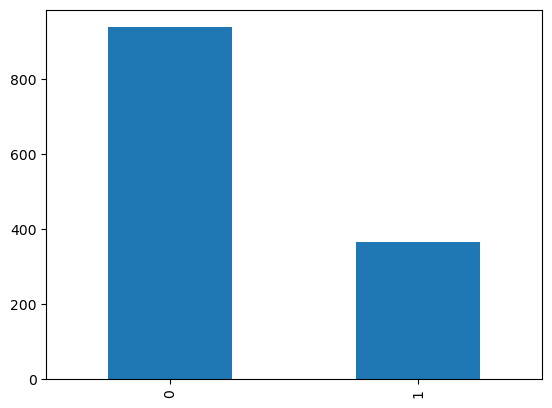

In [29]:
df.IPS.value_counts().plot(kind='bar')
plt.show()

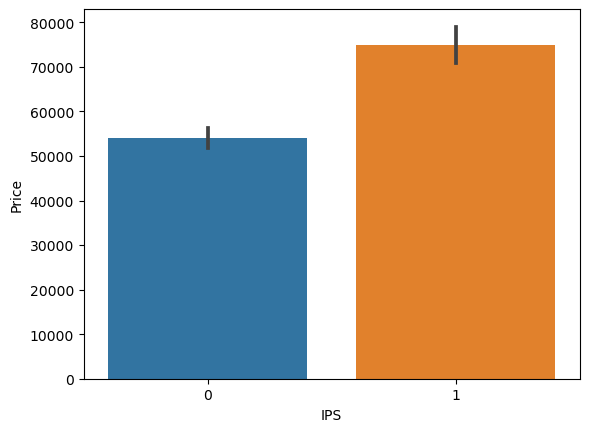

In [30]:
sns.barplot(x=df.IPS, y=df.Price)
plt.show()

**Inference-**
- There are very less no. of IPS Panel laptops compared to other laptops.
- IPS Panel laptops are expensive compared to non-touchscreen laptops.
- Hence, IPS column is important for further analysis.

In [31]:
new = df['ScreenResolution'].str.split('x', n=1, expand=True)

In [32]:
df['X_Resolution'] = new[0]
df['Y_Resolution'] = new[1]

In [33]:
df.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,X_Resolution,Y_Resolution
962,Acer,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,12,128GB SSD + 1TB HDD,Nvidia GeForce GTX 950M,Windows 10,2.40,53759.5200,0,0,Full HD 1920,1080
858,Dell,Notebook,13.3,Full HD / Touchscreen 1920x1080,Intel Core i5 6200U 2.3GHz,8,1TB HDD,Intel HD Graphics 520,Windows 10,1.62,34578.7200,1,0,Full HD / Touchscreen 1920,1080
228,Asus,Notebook,17.3,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD + 500GB HDD,Nvidia GeForce GTX 950M,Windows 10,2.69,47472.4800,0,0,Full HD 1920,1080
52,HP,Notebook,15.6,Full HD 1920x1080,AMD A6-Series 9220 2.5GHz,4,256GB SSD,AMD Radeon R4 Graphics,Windows 10,1.86,21231.5472,0,0,Full HD 1920,1080
616,Dell,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,4,128GB SSD,AMD Radeon R5 M420,Linux,2.18,30316.3200,0,0,Full HD 1920,1080


In [34]:
df['X_Resolution'] = df['X_Resolution'].str.replace(',','').str.findall(r'(\d+\.?\d+)').apply(lambda x:x[0])

In [35]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,X_Resolution,Y_Resolution
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
 11  Touchscreen       1303 non-null   int64  
 12  IPS               1303 non-null   int64  
 13  X_Resolution      1303 non-null   object 
 14  Y_Resolution      1303 non-null   object 
dtypes: float32(1), float64(2), int32(1), int64(2), object(9)
memory usage: 142.6+ KB


In [37]:
df['X_Resolution'] = df.X_Resolution.astype('int')
df['Y_Resolution'] = df.Y_Resolution.astype('int')

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
 11  Touchscreen       1303 non-null   int64  
 12  IPS               1303 non-null   int64  
 13  X_Resolution      1303 non-null   int32  
 14  Y_Resolution      1303 non-null   int32  
dtypes: float32(1), float64(2), int32(3), int64(2), object(7)
memory usage: 132.5+ KB


In [39]:
df.corr()['Price']

Inches          0.068197
Ram             0.743007
Weight          0.210370
Price           1.000000
Touchscreen     0.191226
IPS             0.252208
X_Resolution    0.556529
Y_Resolution    0.552809
Name: Price, dtype: float64

**Inference-**
- Inches, Weight, Touchscreen and IPS has less correlation with the price of laptops.
- RAM, X_Resolution and Y_Resolution has good correlation with price of laptops.
- I will create a new column - **Pixels per inches (PPI)** using Inches, X_Resolution and Y_Resolution, to reduce multicolinearity between X_Resolution and Y_Resolution, and make better use of Inches column.

In [40]:
df['PPI'] = (((df.X_Resolution**2) + (df.Y_Resolution**2))*0.5/df.Inches).astype('float')

In [41]:
df.corr()['Price']

Inches          0.068197
Ram             0.743007
Weight          0.210370
Price           1.000000
Touchscreen     0.191226
IPS             0.252208
X_Resolution    0.556529
Y_Resolution    0.552809
PPI             0.480017
Name: Price, dtype: float64

**Inference-**
- As we can see, PPI has good correlation with Price of laptops, which contains all the required information from ScreenResolution column.
- Now we can drop ScreenResolution column.

In [42]:
df.drop(columns=['ScreenResolution'], inplace=True)

In [43]:
df.drop(columns=['Inches', 'X_Resolution', 'Y_Resolution'], inplace=True)

In [44]:
df.sample(5)

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,PPI
229,HP,Notebook,Intel Core i7 7500U 2.7GHz,8,1TB HDD,AMD FirePro W4190M,Windows 10,1.90,67612.3200,0,0,155538.461538
1136,HP,Workstation,Intel Core i7 6700HQ 2.6GHz,8,256GB SSD,Nvidia Quadro M3000M,Windows 7,3.00,210424.0320,0,1,140254.335260
44,Dell,2 in 1 Convertible,Intel Core i5 8250U 1.6GHz,12,1TB HDD,Nvidia GeForce 150MX,Windows 10,2.77,53226.7200,1,0,140254.335260
1132,Asus,Notebook,Intel Celeron Dual Core N3350 1.1GHz,4,32GB Flash Storage,Intel HD Graphics 500,Windows 10,1.50,14811.8400,0,0,87706.428571
728,Dell,Notebook,Intel Core i5 7200U 2.5GHz,8,1TB HDD,AMD Radeon R7 M445,Linux,2.32,31409.6256,0,0,78710.897436


In [45]:
df['PPI'] = round(df.PPI, 2)

In [46]:
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,PPI
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,342616.54
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,108406.02
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,155538.46
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,374493.51
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,342616.54


- Fetching information from CPU column.

In [47]:
df['Cpu'].value_counts()

Intel Core i5 7200U 2.5GHz       190
Intel Core i7 7700HQ 2.8GHz      146
Intel Core i7 7500U 2.7GHz       134
Intel Core i7 8550U 1.8GHz        73
Intel Core i5 8250U 1.6GHz        72
                                ... 
Intel Core M M3-6Y30 0.9GHz        1
AMD A9-Series 9420 2.9GHz          1
Intel Core i3 6006U 2.2GHz         1
AMD A6-Series 7310 2GHz            1
Intel Xeon E3-1535M v6 3.1GHz      1
Name: Cpu, Length: 118, dtype: int64

In [48]:
df['Cpu_Name'] = df['Cpu'].apply(lambda x:' '.join(x.split()[0:3]))

In [49]:
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,PPI,Cpu_Name
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,342616.54,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,108406.02,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,155538.46,Intel Core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,374493.51,Intel Core i7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,342616.54,Intel Core i5


In [50]:
def fetch_processor(text):
    if text == 'Intel Core i7' or text == 'Intel Core i5' or text == 'Intel Core i3':
        return text
    else:
        if text.split()[0] == 'Intel':
            return 'Other Intel Processor'
        else:
            return 'AMD Processor'

In [51]:
df['Cpu_Brand'] = df['Cpu_Name'].apply(fetch_processor)

In [52]:
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,PPI,Cpu_Name,Cpu_Brand
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,342616.54,Intel Core i5,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,108406.02,Intel Core i5,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,155538.46,Intel Core i5,Intel Core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,374493.51,Intel Core i7,Intel Core i7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,342616.54,Intel Core i5,Intel Core i5


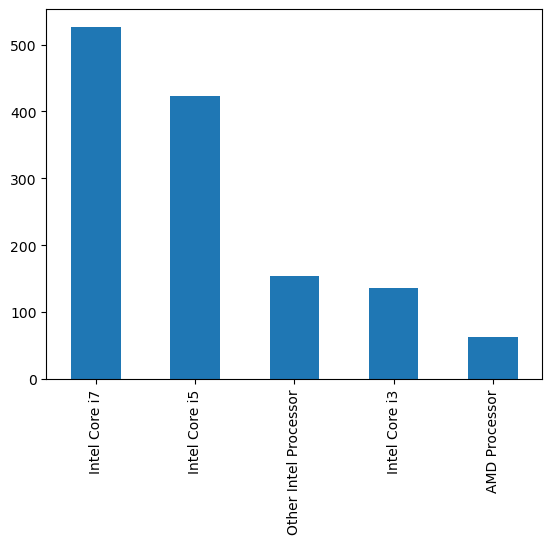

In [53]:
df['Cpu_Brand'].value_counts().plot(kind='bar')
plt.show()

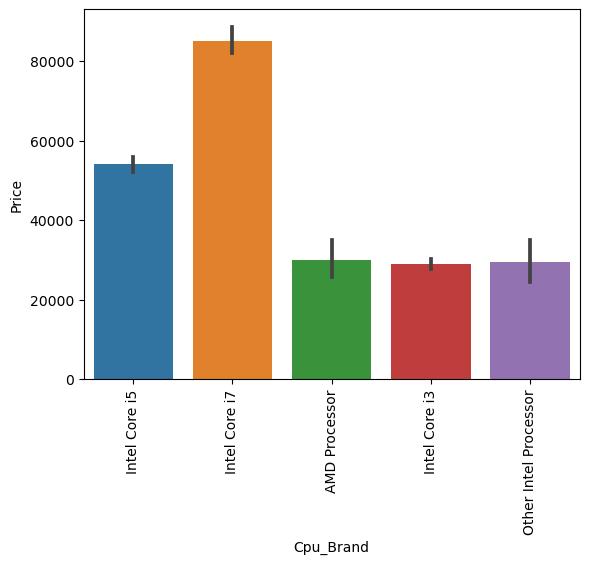

In [54]:
sns.barplot(x=df['Cpu_Brand'], y=df['Price'])
plt.xticks(rotation=90)
plt.show()

In [55]:
df.drop(columns=['Cpu', 'Cpu_Name'], inplace=True)

In [56]:
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,PPI,Cpu_Brand
0,Apple,Ultrabook,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,342616.54,Intel Core i5
1,Apple,Ultrabook,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,108406.02,Intel Core i5
2,HP,Notebook,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,155538.46,Intel Core i5
3,Apple,Ultrabook,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,374493.51,Intel Core i7
4,Apple,Ultrabook,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,342616.54,Intel Core i5


- Fetching information from Ram column.

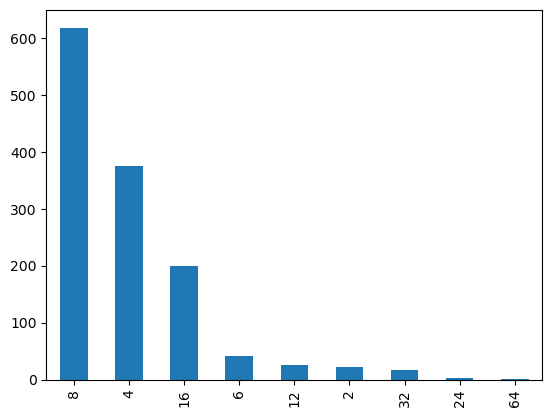

In [57]:
df['Ram'].value_counts().plot(kind='bar')
plt.show()

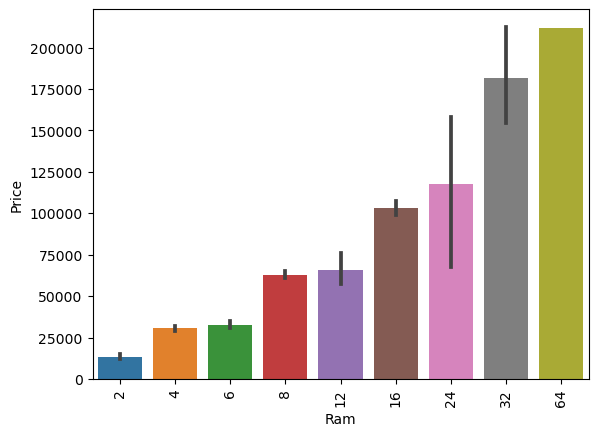

In [58]:
sns.barplot(x=df['Ram'], y=df['Price'])
plt.xticks(rotation=90)
plt.show()

- Fetching information from Memory column.

In [59]:
df.Memory.value_counts()

256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                38
2TB HDD                           16
64GB Flash Storage                15
512GB SSD +  1TB HDD              14
1TB SSD                           14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD             1
5

**Inference-**
- There is a lot of variation in memory combinations of laptops, which may cause issues for data analysis.
- Hence I will create four different columns using this Memory column.

In [60]:
df['Memory'] = df['Memory'].astype(str).replace('\.0', '', regex=True)
df['Memory'] = df['Memory'].astype(str).replace('GB', '')
df['Memory'] = df['Memory'].astype(str).replace('TB', '000')
new = df['Memory'].str.split('+', n=1, expand=True)

df['first'] = new[0]
df['first'] = df['first'].str.strip()

df['second'] = new[1]

df['Layer1HDD'] = df['first'].apply(lambda x:1 if 'HDD' in x else 0)
df['Layer1SSD'] = df['first'].apply(lambda x:1 if 'SSD' in x else 0)
df['Layer1Hybrid'] = df['first'].apply(lambda x:1 if 'Hybrid' in x else 0)
df['Layer1Flash_Storage'] = df['first'].apply(lambda x:1 if 'Flash Storage' in x else 0)

df['first'] = df['first'].str.replace(r'\D', '')

df['second'].fillna('0', inplace=True)

df['Layer2HDD'] = df['second'].apply(lambda x:1 if 'HDD' in x else 0)
df['Layer2SSD'] = df['second'].apply(lambda x:1 if 'SSD' in x else 0)
df['Layer2Hybrid'] = df['second'].apply(lambda x:1 if 'Hybrid' in x else 0)
df['Layer2Flash_Storage'] = df['second'].apply(lambda x:1 if 'Flash Storage' in x else 0)

df['second'] = df['second'].str.replace(r'\D', '')

df['first'] = df['first'].astype(int)
df['second'] = df['second'].astype(int)

df['HDD'] = (df['first']*df['Layer1HDD'] + df['second']*df['Layer2HDD'])
df['SSD'] = (df['first']*df['Layer1SSD'] + df['second']*df['Layer2SSD'])
df['Hybrid'] = (df['first']*df['Layer1Hybrid'] + df['second']*df['Layer2Hybrid'])
df['Flash_Storage'] = (df['first']*df['Layer1Flash_Storage'] + df['second']*df['Layer2Flash_Storage'])

df.drop(columns=['first','second','Layer1HDD','Layer1SSD','Layer1Hybrid','Layer1Flash_Storage',
                 'Layer2HDD','Layer2SSD','Layer2Hybrid','Layer2Flash_Storage'], inplace=True)

C:\Users\Rakshita\AppData\Local\Temp\ipykernel_6036\1486380079.py:16: FutureWarning: The default value of regex will change from True to False in a future version.
  df['first'] = df['first'].str.replace(r'\D', '')
C:\Users\Rakshita\AppData\Local\Temp\ipykernel_6036\1486380079.py:25: FutureWarning: The default value of regex will change from True to False in a future version.
  df['second'] = df['second'].str.replace(r'\D', '')


In [61]:
df.sample(5)

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,PPI,Cpu_Brand,HDD,SSD,Hybrid,Flash_Storage
1016,HP,Notebook,4,256GB SSD,Intel HD Graphics 620,Windows 10,2.04,41025.0672,0,0,78710.90,Intel Core i3,0,256,0,0
577,Lenovo,Gaming,32,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1070,Windows 10,4.60,141884.6400,0,1,140254.34,Intel Core i7,1,256,0,0
363,HP,Notebook,8,1TB HDD,Intel HD Graphics 620,Windows 10,1.86,34045.9200,0,0,155538.46,Intel Core i5,1,0,0,0
899,Dell,Notebook,8,500GB HDD,Intel HD Graphics 620,Windows 10,1.90,49816.8000,0,0,155538.46,Intel Core i5,500,0,0,0
1168,HP,Notebook,2,32GB Flash Storage,Intel HD Graphics 400,Windows 10,1.44,13266.7200,0,0,87706.43,Other Intel Processor,0,0,0,32


In [62]:
df.drop(columns=['Memory'], inplace=True)

In [63]:
df.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,IPS,PPI,Cpu_Brand,HDD,SSD,Hybrid,Flash_Storage
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,342616.54,Intel Core i5,0,128,0,0
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,108406.02,Intel Core i5,0,0,0,128
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,155538.46,Intel Core i5,0,256,0,0
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,374493.51,Intel Core i7,0,512,0,0
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,342616.54,Intel Core i5,0,256,0,0


In [64]:
df.corr()['Price']

Ram              0.743007
Weight           0.210370
Price            1.000000
Touchscreen      0.191226
IPS              0.252208
PPI              0.480017
HDD             -0.234901
SSD              0.547358
Hybrid          -0.004769
Flash_Storage   -0.040511
Name: Price, dtype: float64

In [65]:
df.drop(columns=['Hybrid','Flash_Storage'], inplace=True)

In [66]:
df.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,IPS,PPI,Cpu_Brand,HDD,SSD
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,342616.54,Intel Core i5,0,128
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,108406.02,Intel Core i5,0,0
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,155538.46,Intel Core i5,0,256
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,374493.51,Intel Core i7,0,512
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,342616.54,Intel Core i5,0,256


- Fetching information from Gpu column.

In [67]:
df.Gpu.value_counts()

Intel HD Graphics 620      281
Intel HD Graphics 520      185
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
                          ... 
AMD Radeon R5 520            1
AMD Radeon R7                1
Intel HD Graphics 540        1
AMD Radeon 540               1
ARM Mali T860 MP4            1
Name: Gpu, Length: 110, dtype: int64

In [68]:
df['Gpu_Brand'] = df.Gpu.apply(lambda x:x.split()[0])

In [69]:
df.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,IPS,PPI,Cpu_Brand,HDD,SSD,Gpu_Brand
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,342616.54,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,108406.02,Intel Core i5,0,0,Intel
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,155538.46,Intel Core i5,0,256,Intel
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,374493.51,Intel Core i7,0,512,AMD
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,342616.54,Intel Core i5,0,256,Intel


In [70]:
df.Gpu_Brand.value_counts()

Intel     722
Nvidia    400
AMD       180
ARM         1
Name: Gpu_Brand, dtype: int64

In [71]:
df = df[df.Gpu_Brand != 'ARM']

In [72]:
df.Gpu_Brand.value_counts()

Intel     722
Nvidia    400
AMD       180
Name: Gpu_Brand, dtype: int64

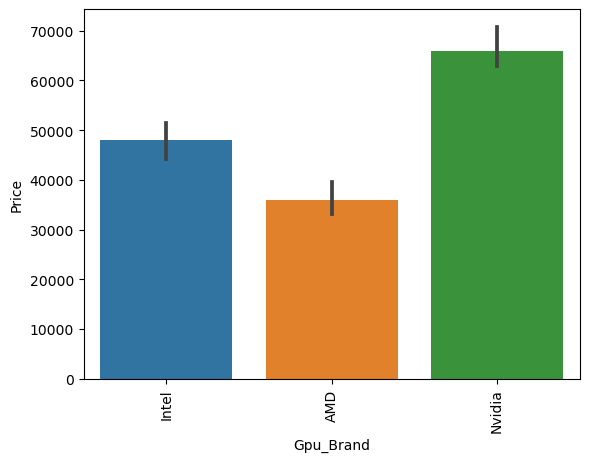

In [73]:
sns.barplot(x=df['Gpu_Brand'], y=df['Price'], estimator=np.median)
plt.xticks(rotation=90)
plt.show()

In [74]:
df.drop(columns=['Gpu'], inplace=True)

In [75]:
df.head()

,Company,TypeName,Ram,OpSys,Weight,Price,Touchscreen,IPS,PPI,Cpu_Brand,HDD,SSD,Gpu_Brand
0,Apple,Ultrabook,8,macOS,1.37,71378.6832,0,1,342616.54,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,8,macOS,1.34,47895.5232,0,0,108406.02,Intel Core i5,0,0,Intel
2,HP,Notebook,8,No OS,1.86,30636.0000,0,0,155538.46,Intel Core i5,0,256,Intel
3,Apple,Ultrabook,16,macOS,1.83,135195.3360,0,1,374493.51,Intel Core i7,0,512,AMD
4,Apple,Ultrabook,8,macOS,1.37,96095.8080,0,1,342616.54,Intel Core i5,0,256,Intel


- Fetching information from OpSys column.

In [76]:
df['OpSys'].value_counts()

Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         26
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: OpSys, dtype: int64

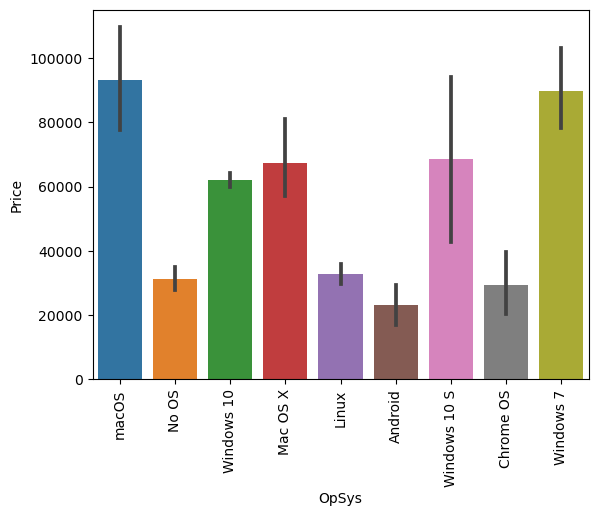

In [77]:
sns.barplot(x=df.OpSys, y=df.Price)
plt.xticks(rotation=90)
plt.show()

In [78]:
def cat_os(inp):
    if inp == 'Windows 10' or inp == 'Windows 7' or inp == 'Windows 10 S':
        return 'Windows'
    elif inp == 'macOS' or inp == 'Mac OS X':
        return 'Mac'
    else:
        return 'Others/No OS/Linux'

In [79]:
df['OS'] = df['OpSys'].apply(cat_os)

In [80]:
df.head()

,Company,TypeName,Ram,OpSys,Weight,Price,Touchscreen,IPS,PPI,Cpu_Brand,HDD,SSD,Gpu_Brand,OS
0,Apple,Ultrabook,8,macOS,1.37,71378.6832,0,1,342616.54,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,macOS,1.34,47895.5232,0,0,108406.02,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,No OS,1.86,30636.0000,0,0,155538.46,Intel Core i5,0,256,Intel,Others/No OS/Linux
3,Apple,Ultrabook,16,macOS,1.83,135195.3360,0,1,374493.51,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,macOS,1.37,96095.8080,0,1,342616.54,Intel Core i5,0,256,Intel,Mac


In [81]:
df.drop(columns=['OpSys'], inplace=True)

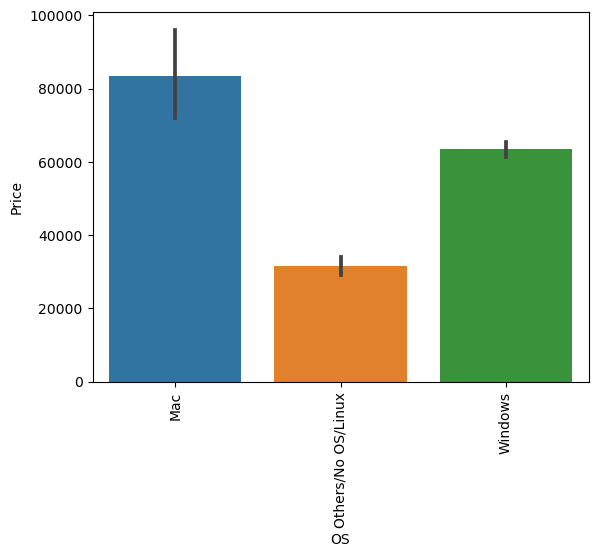

In [82]:
sns.barplot(x=df.OS, y=df.Price)
plt.xticks(rotation=90)
plt.show()

- Fetching information from Weight column.

C:\Users\Rakshita\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


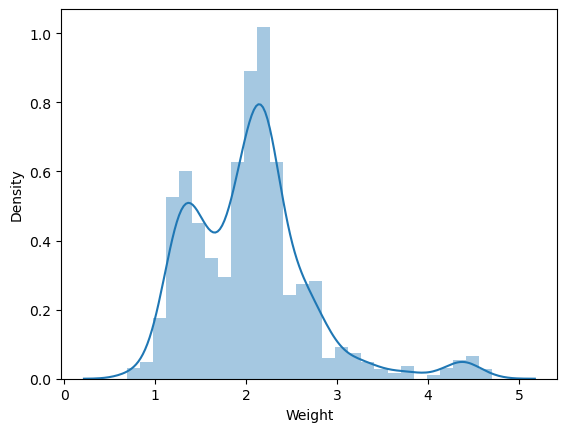

In [83]:
sns.distplot(df['Weight'])
plt.show()

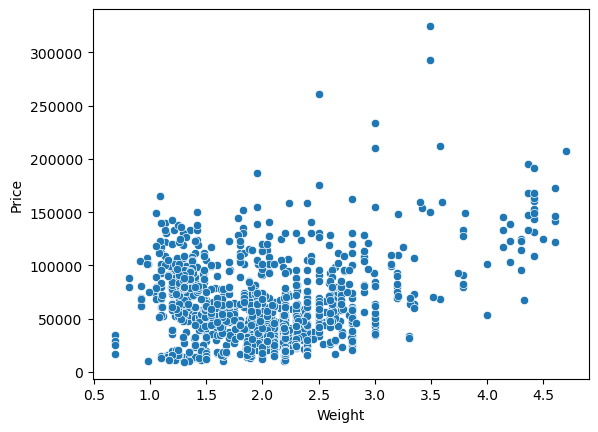

In [84]:
sns.scatterplot(x=df.Weight, y=df.Price)
plt.show()

<AxesSubplot:>

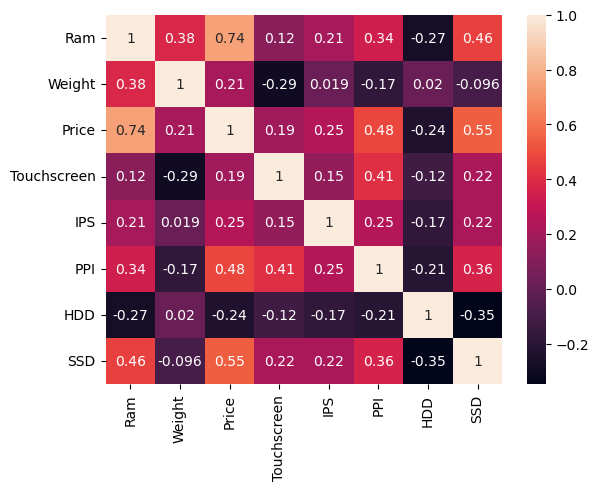

In [85]:
sns.heatmap(df.corr(), annot=True)

- Working on target variable - Price
        
    Since it is positively skewed, I will apply Log Transformation to make the data normally distributed.

C:\Users\Rakshita\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


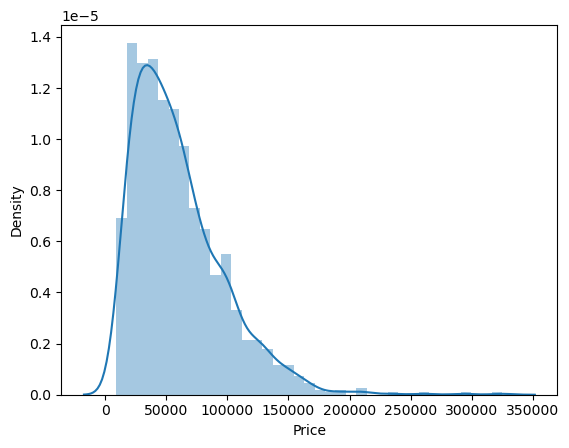

In [86]:
sns.distplot(df.Price)
plt.show()

### Model Validation -

In [87]:
X = df.drop(columns=['Price'])
y = np.log(df['Price'])

In [88]:
X.head()

,Company,TypeName,Ram,Weight,Touchscreen,IPS,PPI,Cpu_Brand,HDD,SSD,Gpu_Brand,OS
0,Apple,Ultrabook,8,1.37,0,1,342616.54,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,0,0,108406.02,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,0,0,155538.46,Intel Core i5,0,256,Intel,Others/No OS/Linux
3,Apple,Ultrabook,16,1.83,0,1,374493.51,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,0,1,342616.54,Intel Core i5,0,256,Intel,Mac


In [89]:
y.head()

0    11.175755
1    10.776777
2    10.329931
3    11.814476
4    11.473101
Name: Price, dtype: float64

In [90]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=2)

- Perform One-Hot Encoding for categorical columns using ColumnTransformer and Pipeline method.

In [91]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score, mean_absolute_error

In [92]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, ExtraTreesRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR

#### Linear Regression

In [93]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(sparse=False, drop='first'), [0,1,7,10,11])
], remainder='passthrough')

step2 = LinearRegression()

pipe = Pipeline([
    ('Step1', step1),
    ('Step2', step2)
])

pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)

print('R2 Score -', r2_score(y_test, y_pred))
print('MAE -', mean_absolute_error(y_test, y_pred))

R2 Score - 0.8028204678158561
MAE - 0.21417195480598586


#### Ridge Regression

In [94]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(sparse=False, drop='first'), [0,1,7,10,11])
], remainder='passthrough')

step2 = Ridge(alpha=10)

pipe = Pipeline([
    ('Step1', step1),
    ('Step2', step2)
])

pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)

print('R2 Score -', r2_score(y_test, y_pred))
print('MAE -', mean_absolute_error(y_test, y_pred))

R2 Score - 0.807771710450386
MAE - 0.21257222286900665


#### Lasso Regression

In [95]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(sparse=False, drop='first'), [0,1,7,10,11])
], remainder='passthrough')

step2 = Lasso(alpha=0.001)

pipe = Pipeline([
    ('Step1', step1),
    ('Step2', step2)
])

pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)

print('R2 Score -', r2_score(y_test, y_pred))
print('MAE -', mean_absolute_error(y_test, y_pred))

R2 Score - 0.8019572618324411
MAE - 0.2146997817397166


#### KNN

In [96]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(sparse=False, drop='first'), [0,1,7,10,11])
], remainder='passthrough')

step2 = KNeighborsRegressor(n_neighbors=3)

pipe = Pipeline([
    ('Step1', step1),
    ('Step2', step2)
])

pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)

print('R2 Score -', r2_score(y_test, y_pred))
print('MAE -', mean_absolute_error(y_test, y_pred))

R2 Score - 0.8198446794273306
MAE - 0.19388277261709155


#### Decision Tree Regressor

In [97]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(sparse=False, drop='first'), [0,1,7,10,11])
], remainder='passthrough')

step2 = DecisionTreeRegressor(max_depth=8)

pipe = Pipeline([
    ('Step1', step1),
    ('Step2', step2)
])

pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)

print('R2 Score -', r2_score(y_test, y_pred))
print('MAE -', mean_absolute_error(y_test, y_pred))

R2 Score - 0.8218678113830831
MAE - 0.1971689491066652


#### Support Vector Machine

In [98]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(sparse=False, drop='first'), [0,1,7,10,11])
], remainder='passthrough')

step2 = SVR(kernel='rbf', C=10000, epsilon=0.1)

pipe = Pipeline([
    ('Step1', step1),
    ('Step2', step2)
])

pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)

print('R2 Score -', r2_score(y_test, y_pred))
print('MAE -', mean_absolute_error(y_test, y_pred))

R2 Score - 0.4919657365812432
MAE - 0.3511766443587468


#### Random Forest Regressor

In [99]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(sparse=False, drop='first'), [0,1,7,10,11])
], remainder='passthrough')

step2 = RandomForestRegressor(n_estimators=100,
                             random_state=3,
                             max_samples=0.5,
                             max_features=0.75,
                             max_depth=15)

pipe = Pipeline([
    ('Step1', step1),
    ('Step2', step2)
])

pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)

print('R2 Score -', r2_score(y_test, y_pred))
print('MAE -', mean_absolute_error(y_test, y_pred))

R2 Score - 0.8837853587948851
MAE - 0.1604832047425315


#### Extra Trees Regressor

In [100]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(sparse=False, drop='first'), [0,1,7,10,11])
], remainder='passthrough')

step2 = ExtraTreesRegressor(n_estimators=100,
                             random_state=3,
                             max_samples=0.5,
                             max_features=0.75,
                             max_depth=15,
                           bootstrap=True)

pipe = Pipeline([
    ('Step1', step1),
    ('Step2', step2)
])

pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)

print('R2 Score -', r2_score(y_test, y_pred))
print('MAE -', mean_absolute_error(y_test, y_pred))

R2 Score - 0.8778502083699141
MAE - 0.16583562367076493


#### AdaBoost Regressor

In [101]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(sparse=False, drop='first'), [0,1,7,10,11])
], remainder='passthrough')

step2 = AdaBoostRegressor(n_estimators=15,
                             learning_rate=1.0)

pipe = Pipeline([
    ('Step1', step1),
    ('Step2', step2)
])

pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)

print('R2 Score -', r2_score(y_test, y_pred))
print('MAE -', mean_absolute_error(y_test, y_pred))

R2 Score - 0.7962836651210802
MAE - 0.22574981843561448


#### Gradient Boost Regressor

In [102]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(sparse=False, drop='first'), [0,1,7,10,11])
], remainder='passthrough')

step2 = GradientBoostingRegressor(n_estimators=500)

pipe = Pipeline([
    ('Step1', step1),
    ('Step2', step2)
])

pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)

print('R2 Score -', r2_score(y_test, y_pred))
print('MAE -', mean_absolute_error(y_test, y_pred))

R2 Score - 0.8739387895612015
MAE - 0.16081566525078647


#### XG Boost Regressor

In [103]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(sparse=False, drop='first'), [0,1,7,10,11])
], remainder='passthrough')

step2 = XGBRegressor(n_estimators=45,
                    max_depth=5,
                    learning_rate=0.5)

pipe = Pipeline([
    ('Step1', step1),
    ('Step2', step2)
])

pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)

print('R2 Score -', r2_score(y_test, y_pred))
print('MAE -', mean_absolute_error(y_test, y_pred))

R2 Score - 0.868133619986617
MAE - 0.17139163292379134


#### Voting Regressor

In [104]:
from sklearn.ensemble import VotingRegressor, StackingRegressor

step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(sparse=False, drop='first'), [0,1,7,10,11])
], remainder='passthrough')

rf = RandomForestRegressor(n_estimators=350,random_state=3,max_samples=0.5,max_features=0.75,max_depth=15)
gbdt = GradientBoostingRegressor(n_estimators=100, max_features=0.5)
xgb = XGBRegressor(n_estimators=25,max_depth=5,learning_rate=0.3)
lr = LinearRegression()
et = ExtraTreesRegressor(n_estimators=100,random_state=3,max_samples=0.5,max_features=0.75,max_depth=10,bootstrap=True)

step2 = VotingRegressor([('rf',rf), ('gbdt',gbdt), ('xgb',xgb), ('et',et)], weights=[5,1,1,1])

pipe = Pipeline([
    ('Step1', step1),
    ('Step2', step2)
])

pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)

print('R2 Score -', r2_score(y_test, y_pred))
print('MAE -', mean_absolute_error(y_test, y_pred))

R2 Score - 0.883947632201512
MAE - 0.16151934294268272


#### Stacking Regressor

In [105]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(sparse=False, drop='first'), [0,1,7,10,11])
], remainder='passthrough')

estimators = [
    ('rf', RandomForestRegressor(n_estimators=350,random_state=3,max_samples=0.5,max_features=0.75,max_depth=15)),
    ('gbdt', GradientBoostingRegressor(n_estimators=100, max_features=0.5)),
    ('et', ExtraTreesRegressor(n_estimators=100,random_state=3,max_samples=0.5,max_features=0.75,max_depth=10,bootstrap=True))
]

step2 = StackingRegressor(estimators=estimators, final_estimator=Ridge(alpha=100))

pipe = Pipeline([
    ('Step1', step1),
    ('Step2', step2)
])

pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)

print('R2 Score -', r2_score(y_test, y_pred))
print('MAE -', mean_absolute_error(y_test, y_pred))

R2 Score - 0.8780627128343576
MAE - 0.1682231374217479


### Deployment -

#### Export the Model

import pickle

pickle.dump(df, open('df.pkl', 'wb'))
pickle.dump(pipe, open('pipe.pkl', 'wb'))

In [106]:
df.head()

,Company,TypeName,Ram,Weight,Price,Touchscreen,IPS,PPI,Cpu_Brand,HDD,SSD,Gpu_Brand,OS
0,Apple,Ultrabook,8,1.37,71378.6832,0,1,342616.54,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,47895.5232,0,0,108406.02,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,30636.0000,0,0,155538.46,Intel Core i5,0,256,Intel,Others/No OS/Linux
3,Apple,Ultrabook,16,1.83,135195.3360,0,1,374493.51,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,96095.8080,0,1,342616.54,Intel Core i5,0,256,Intel,Mac


In [107]:
import pickle

model = open('pipe.pickle', 'wb')
pickle.dump(pipe, model)
model.close()

In [108]:
%%writefile app.py
import streamlit as st
import pickle
import pandas as pd
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor

model = open('pipe.pickle', 'rb')
clf = pickle.load(model)
model.close()

st.title('Laptop Predictor')
st.markdown('Estimate the price of the laptop..!')

# brand
company = st.selectbox('Brand', ['Apple', 'HP', 'Acer', 'Asus', 'Dell', 'Lenovo', 'Chuwi', 'MSI',
       'Microsoft', 'Toshiba', 'Huawei', 'Xiaomi', 'Vero', 'Razer',
       'Mediacom', 'Samsung', 'Google', 'Fujitsu', 'LG'])

# type of laptop
type_ = st.selectbox('Type', ['Ultrabook', 'Notebook', 'Netbook', 'Gaming', '2 in 1 Convertible',
       'Workstation'])

# Ram
ram = st.selectbox('RAM(in GB)', [2,4,6,8,12,16,24,32,64])

# weight
weight = st.number_input('Weight of the Laptop', 0.0, 5.0, 0.01)

# Touchscreen
touchscreen = st.selectbox('Touchscreen', ['No','Yes'])

# IPS
ips = st.selectbox('IPS', ['No','Yes'])

# screen size
screen_size = st.number_input('Screen Size', 0.0,880000)

# resolution
resolution = st.selectbox('Screen Resolution', ['1920x1080','1366x768','1600x900','3840x2160','3200x1800','2880x1800','2560x1600','2560x1440','2304x1440'])

# cpu
cpu = st.selectbox('CPU', ['Intel Core i5', 'Intel Core i7', 'AMD Processor', 'Intel Core i3',
       'Other Intel Processor'])

# hdd
hdd = st.selectbox('HDD(in GB)', [0,128,256,512,1024,2048])

# ssd
ssd = st.selectbox('SSD(in GB)', [0,8,128,256,512,1024])

# gpu
gpu = st.selectbox('GPU', ['Intel', 'AMD', 'Nvidia'])

# os
os = st.selectbox('OS', ['Mac', 'Others/No OS/Linux', 'Windows'])

df = {'Company':company,
      'TypeName':type_,
      'Ram':ram,
      'Weight':weight,
      'Touchscreen':touchscreen,
      'IPS':ips,
      'PPI':screen_size,
      'Screen Resolution':resolution,
      'Cpu_Brand':cpu,
      'HDD':hdd,
      'SSD':ssd,
      'Gpu_Brand':gpu,
      'OS':os}

df = pd.DataFrame([df])

if st.button('Predict Price'):
    ppi = None
    if touchscreen == 'Yes':
        touchscreen = 1
    else:
        touchscreen = 0

    if ips == 'Yes':
        ips = 1
    else:
        ips = 0

    X_res = int(resolution.split('x')[0])
    Y_res = int(resolution.split('x')[1])
    ppi = ((X_res**2) + (Y_res**2))**0.5/screen_size
    query = np.array([company,type_,ram,weight,touchscreen,ips,ppi,cpu,hdd,ssd,gpu,os])

    query = query.reshape(1,12)
    pipe = clf.predict(query)[0]
    st.title("The predicted price of this configuration is " + str(int(np.exp(pipe))))


Overwriting app.py


In [109]:
df.sample(5)

,Company,TypeName,Ram,Weight,Price,Touchscreen,IPS,PPI,Cpu_Brand,HDD,SSD,Gpu_Brand,OS
586,HP,Gaming,16,3.78,79813.44,0,1,140254.34,Intel Core i7,1,256,Nvidia,Windows
65,Asus,Ultrabook,16,1.80,105654.24,0,0,155538.46,Intel Core i7,0,512,Nvidia,Windows
783,Lenovo,Notebook,8,2.20,17529.12,0,0,78710.90,Other Intel Processor,1,0,Intel,Others/No OS/Linux
311,Dell,Ultrabook,16,1.21,133146.72,1,1,729744.36,Intel Core i7,0,1,Intel,Windows
719,HP,Notebook,8,2.63,63936.00,0,0,140254.34,Intel Core i7,0,256,Nvidia,Windows


In [110]:
df.Weight.max()

4.699999809265137

In [111]:
df.PPI.max()

776448.0